#### This notebook is a tutorial like guide of the steps taken to prepare the data from the Fruits data set

##### 1. I use: Function to load the images paths
##### 1.1 From the images path, the class or label from the image is extracted
##### 1.2 The training_data_loader gets a root_path with an assumed structure and returns the images paths and its respective label

##### 0. Dependencies

In [402]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, random
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

##### Neural Networks


pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.1.0-py3-none-any.whl

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, pooling, MaxPooling2D, Activation, Dropout, BatchNormalization
from keras.layers import Cropping2D
import tensorflow as tf

##### 1. Function to load the images paths

In [173]:
def training_data_loader(root_path):
    image_paths = []
    image_labels = []
    labels_set, ids = [], []
    id_counter = 0
    labels_dir = os.listdir(root_path)
    #  first locate the main root path of the whole data set
    for root, dirs, files in os.walk(root_path):
        # Here we stand in root, which is the complete path of each subfolder
        #if dirs != '.DS_Store':
            #ids.append(id_label)
            #id_label = id_label+1
        for file in files:
            # Herestart reading/iterating inside the files within the subfolder whose location is contained in root
            if file !='.DS_Store':
                image_path = root + '/' + file # the path is assembled 
                image_paths.append(image_path) # List with the path of a file during iteration
                image_labels.append(image_path.split('/')[-2])
    
    
    
    for label in labels_dir:
        #print(label)
        if label != '.DS_Store':
            labels_set.append(label)
            ids.append(id_counter)
            id_counter +=1
    # Convert to ndarray, ease of use later with pandas and native C implementation 
    image_paths = np.array(image_paths) 
    image_labels = np.array(image_labels)
    # size must coincide
    assert len (image_paths) == len (image_labels)
    
    return image_paths, image_labels, ids, labels_set
            

##### 1.5 Dataframe creation

In [171]:
def dataframe(image_labels, ids):
    labels = np.array(image_labels)
    ids = np.array(ids)
    training_dataframe = pd.DataFrame(np.c_[labels, ids], columns = ['Fruit labels', 'Id'])
    return training_dataframe

##### 2. Function that takes the paths and load the images in those ones

In [67]:
def image_loader(images_paths, labels):
    images = []
    for image_path in images_paths:
        image = plt.imread(image_path)
        images.append(image)
    
    images = np.array(images)
    assert len(images) == len(labels)
    
    return images, labels

#### 3. Example of usage

In [175]:
PATH = "/Users/William/Workspace/AI/pro/fruit_classifier/data/raw/fruits-360/Training"

image_paths, image_labels, ids, labels_set = training_data_loader(PATH)
#x_trn, y_trn = image_loader(image_paths, image_labels)

In [242]:
len(image_labels)

41322

In [243]:
fruits_dataframe = dataframe(labels_set, ids)
fruits_dataframe.head()

,Fruit labels,Id
0,Apple Braeburn,0
1,Apple Golden 1,1
2,Apple Golden 2,2
3,Apple Golden 3,3
4,Apple Granny Smith,4


##### 4. Visualization

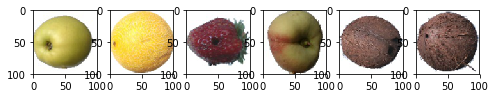

In [179]:
randomizer_int = len(x_trn)
fig, axs = plt.subplots(1,6, figsize=(8,8))
for index in range(0,6):
    axs[index].imshow(x_trn[random.randrange(randomizer_int)])
plt.show()

Cherry 1


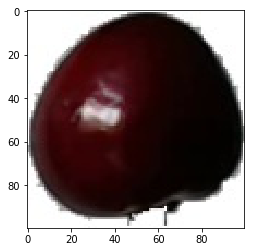

In [180]:
plt.imshow(x_trn[9200])
print(y_trn[9200])

In [181]:
#shapes
print(x_trn.shape, y_trn.shape)


(41322, 100, 100, 3) (41322,)


In [9]:
y_trn = y_trn.reshape(len(y_trn), 1)

In [10]:
y_trn.shape

(41322, 1)

In [11]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(y_trn)
#print(transfomed_label)

print(transfomed_label.shape)
num_classes = transfomed_label.shape[1]
print(num_classes)

y_trn = transfomed_label
print(y_trn.shape)

(41322, 81)
81
(41322, 81)


##### The convolutional neural network

Train on 33057 samples, validate on 8265 samples
Epoch 1/3
33057/33057 [==============================] - 148s 4ms/step - loss: 1.0201 - acc: 0.7316 - val_loss: 0.5018 - val_acc: 0.8502
Epoch 2/3
33057/33057 [==============================] - 144s 4ms/step - loss: 0.1879 - acc: 0.9391 - val_loss: 0.1217 - val_acc: 0.9625
Epoch 3/3
33057/33057 [==============================] - 144s 4ms/step - loss: 0.1148 - acc: 0.9613 - val_loss: 0.1245 - val_acc: 0.9603
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 36)        21636     
_________________________________________________________________
conv2d_8 (Co

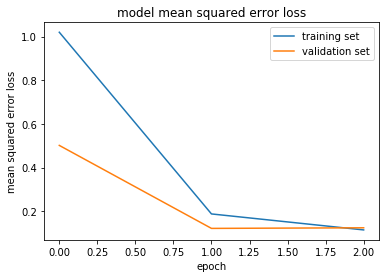

In [14]:
x_trn, y_trn = shuffle(x_trn, y_trn)
model = Sequential()
#### The Layers ####
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (100, 100, 3)))
#model.add(Cropping2D(cropping= ((70, 25), (0,0))))
model.add(Conv2D(24, (5, 5), strides=(2,2),  activation= 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1,1), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1,1), activation = 'relu'))

######## End of Convolutions ######################



#model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())


########### Fully Connected Layers ##################
model.add(Dense(100))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(50))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
model.add(Dense(10))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

#### End: The Layers ####

# Compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The Loss
history_object = model.fit(x_trn, y_trn, validation_split = 0.2, shuffle = True, epochs = 3, verbose = 1) 
model.summary()
# Visualization
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()



# Saving the Model
model.save('model1_cam.h5')

In [17]:
x_trn[42].shape


(100, 100, 3)

In [202]:
fruit = model.predict(x_trn)# predict gets images, returns a vector of probabilities
print(fruit.shape)
print(fruit[0])


(41322, 81)
[9.9302894e-01 5.6991828e-15 1.6334192e-19 2.4588567e-16 2.7152065e-22
 2.9031336e-04 2.1434811e-07 3.8131540e-21 1.2670149e-09 6.6253333e-03
 7.7582998e-09 1.2063519e-13 6.3025174e-18 7.6482564e-23 6.6545022e-25
 3.7687975e-23 3.9207182e-18 4.2715160e-17 8.1649254e-13 6.1410431e-13
 4.7599757e-11 1.4380906e-15 4.0256478e-22 2.5653295e-28 3.4114386e-10
 3.4917968e-15 2.7224423e-17 6.5153945e-25 6.0494578e-09 1.5354937e-09
 1.4338041e-19 1.0691106e-14 3.6500585e-15 1.3860048e-13 3.2327958e-09
 9.0303252e-16 1.0263913e-08 1.3652788e-14 1.4115940e-15 6.2832189e-10
 1.8292934e-12 4.1722992e-23 1.5151994e-15 2.3929738e-14 9.9270384e-11
 5.2819433e-11 8.7379999e-19 3.3019960e-23 5.4781820e-05 4.3308279e-10
 1.3943128e-08 3.8400901e-19 3.8448698e-07 2.3636469e-18 3.7543004e-14
 2.7187159e-25 1.1488356e-15 7.5192896e-23 6.2785180e-19 3.6319545e-11
 2.7958596e-19 7.9526873e-15 5.1120651e-16 2.3311358e-16 4.2412853e-16
 4.1927830e-09 5.0746804e-13 4.3092178e-20 9.8841136e-22 4.984884

In [219]:
np.argmax(fruit[9200])

19

In [220]:
localizator_array = []
for fruit_predicted in range(9190,9201):
    fruit[fruit_predicted]
    #print(np.argmax(fruit[fruit_predicted]))
    localizator = np.argmax(fruit[fruit_predicted])
    localizator_array.append(localizator)
    print(fruits_dataframe['Fruit labels'].iloc[localizator])
    
print(localizator_array)


Carambula
Carambula
Carambula
Carambula
Carambula
Carambula
Carambula
Carambula
Cherry 1
Cherry 1
Cherry 1
[18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19]


In [221]:
max(fruit[9200])
print(np.argmax(fruit[9200]))
print(len(fruit[9200]))

19
81


'Cherry 1'

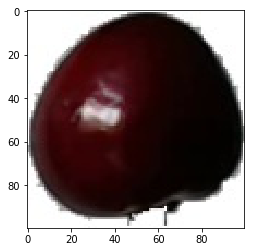

In [222]:
sample = x_trn[9200]
plt.imshow(sample)
#sample.shape
fruits_dataframe['Fruit labels'].iloc[19]

In [224]:
PATH_TEST = "/Users/William/Workspace/AI/pro/fruit_classifier/data/raw/fruits-360/Test"
#pipeline

image_paths_tst, image_labels_tst, ids_tst, labels_set_tst = training_data_loader(PATH_TEST)
test_dataframe = dataframe(labels_set_tst, ids_tst)
print(test_dataframe)
x_tst, y_tst = image_loader(image_paths_tst, image_labels_tst)
#encoder_tst = LabelBinarizer()
#transfomed_label_tst = encoder.fit_transform(y_tst)
fruit_tst = model.predict(x_tst)


           Fruit labels  Id
0        Apple Braeburn   0
1        Apple Golden 1   1
2        Apple Golden 2   2
3        Apple Golden 3   3
4    Apple Granny Smith   4
5           Apple Red 1   5
6           Apple Red 2   6
7           Apple Red 3   7
8   Apple Red Delicious   8
9      Apple Red Yellow   9
10              Apricot  10
11              Avocado  11
12         Avocado ripe  12
13               Banana  13
14           Banana Red  14
15         Cactus fruit  15
16         Cantaloupe 1  16
17         Cantaloupe 2  17
18            Carambula  18
19             Cherry 1  19
20             Cherry 2  20
21       Cherry Rainier  21
22     Cherry Wax Black  22
23       Cherry Wax Red  23
24    Cherry Wax Yellow  24
25           Clementine  25
26                Cocos  26
27                Dates  27
28           Granadilla  28
29           Grape Pink  29
..                  ...  ..
51        Passion Fruit  51
52                Peach  52
53           Peach Flat  53
54                 P

In [405]:
# gotta obtain the Ys (highest value in each row)

localizator_array_tst = []
for fruit_index in range(0,len(fruit_tst)):
    fruit_tst[fruit_index]
    #print(np.argmax(fruit_tst[fruit_index]))
    localizator_tst = np.argmax(fruit_tst[fruit_index])
    localizator_array_tst.append(localizator_tst)
    #print(test_dataframe['Fruit labels'].iloc[localizator_tst])
    
#print((localizator_array_tst)) # this will be y pred


'Apple Granny Smith'

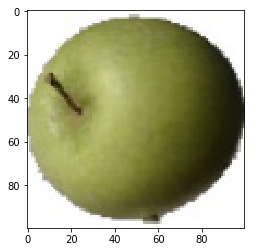

In [237]:
sample_test = x_tst[800]
plt.imshow(sample_test)
#sample.shape
test_dataframe['Fruit labels'].iloc[4]

In [240]:
# I have to create a column made od the Y_test labels and Y_predicted labels

In [388]:
processed_test_data = pd.read_excel('test_data.xlsx')

In [389]:
processed_test_data.head()

,Fruit labels,ID
0,Apple Braeburn,0
1,Apple Braeburn,0
2,Apple Braeburn,0
3,Apple Braeburn,0
4,Apple Braeburn,0


In [392]:
y_pred = np.array(localizator_array_tst)
y_test = processed_test_data['ID']

assert len(y_pred) == len(y_tst)

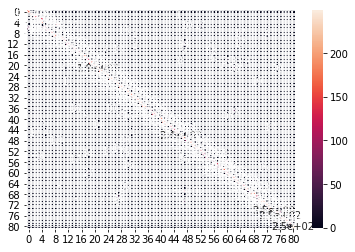

In [401]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [407]:
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model*100, '%')

81.52338401671831 %
